## Compile metrics

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
from plotnine import *
import scIB

In [5]:
sc.set_figure_params(dpi=100)

In [6]:
from numba import set_num_threads

set_num_threads(16)

In [7]:
import sys
import gc

sys.path.append('/home/gokcen/Code/sctoolkit/')

In [8]:
merge = False

if merge:

    metric_df = []

    for seed in [0, 15319, 218673, 664122, 769098]:
        df = pd.read_pickle(f'results_all_{seed}.pkl')
        metric_df.append(df)

    metric_df = pd.concat(metric_df, axis=0).reset_index(drop=True)
    metric_df.Method = pd.Categorical(metric_df.Method, categories=['Uncorrected', 'Harmony', 'MNN', 'BBKNN', 'VAE (8D)', 'VAE (64D)', 'VAE (256D)'])
    metric_df.Variable = pd.Categorical(metric_df.Variable, categories=['Broad cell type', 'tissue', 'channel', 'Participant ID', 'prep'])
    metric_df.to_pickle('results.pkl')

else:
    metric_df = pd.read_pickle('results.pkl')

In [9]:
metric_df[(metric_df.Metric == 'NMI') & (metric_df.Method == 'BBKNN')].shape

(25, 4)

In [16]:
metric_df.Metric = pd.Categorical(metric_df.Metric, categories=['kBET', 'NMI', 'ARI'])

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 3 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-integration-A.pdf
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


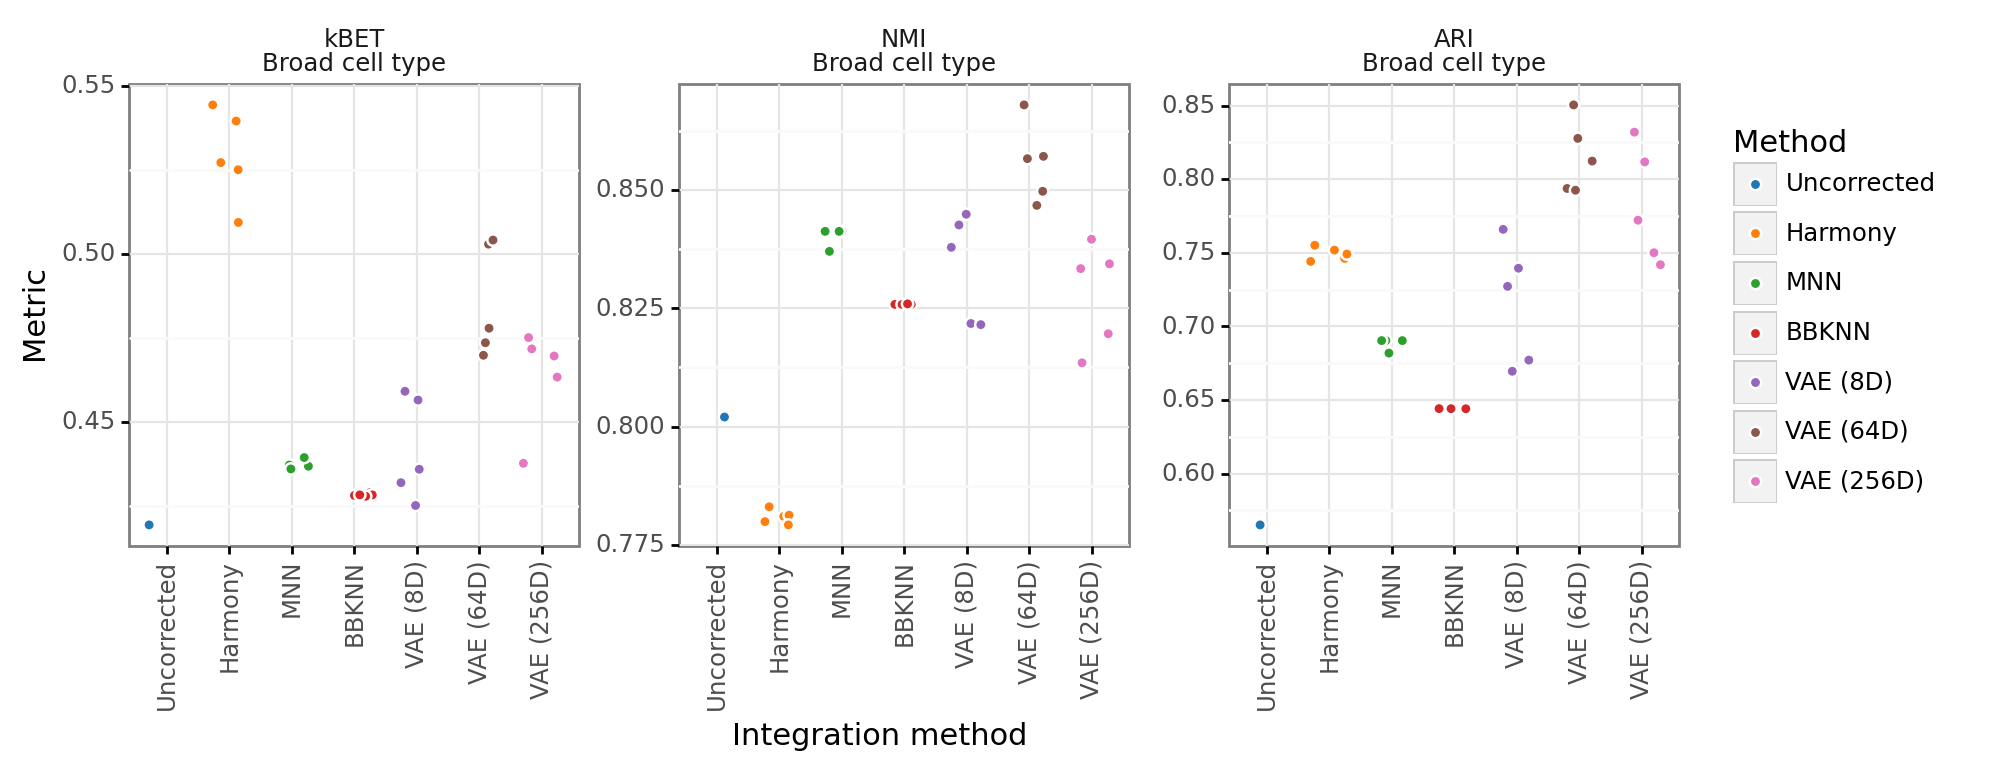

<ggplot: (8730240477181)>

In [28]:
g = (
    ggplot(aes(x='Method', y='Value', fill='Method'), data=metric_df[metric_df.Variable == 'Broad cell type']) +
    geom_jitter(size=1.8, width=0.3, color='white') +
    facet_wrap(['Metric', 'Variable'], ncol=5, scales='free_y') +
    scale_fill_cmap_d('tab10') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90), figure_size=(10, 3), strip_background=element_blank(), panel_spacing_x=0.5) +
    labs(x='Integration method', y='Metric')
)


ggsave(g, 'figure-integration-A.pdf')
g

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.5 x 3 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-integration-C.pdf
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


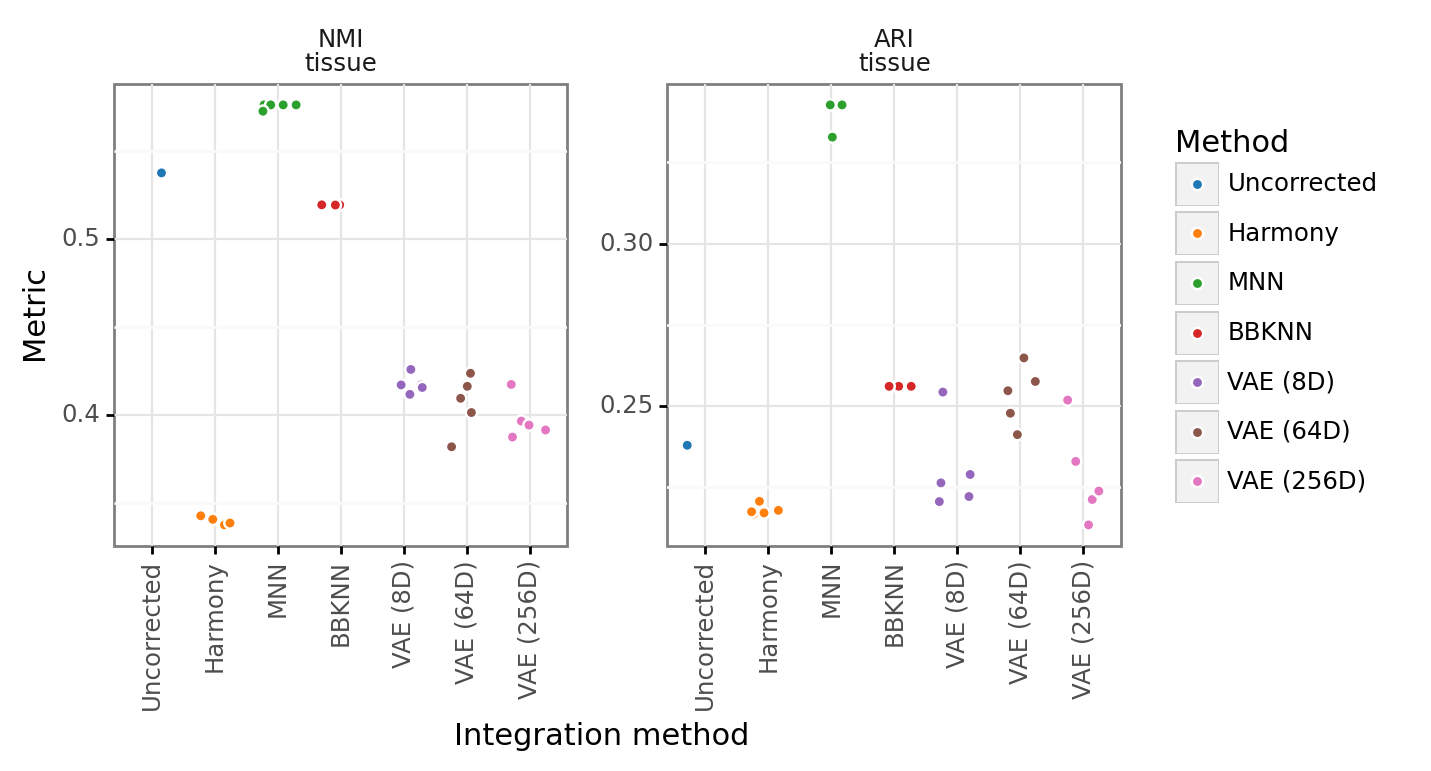

<ggplot: (8730240517295)>

In [29]:
g = (
    ggplot(aes(x='Method', y='Value', fill='Method'), data=metric_df[metric_df.Variable == 'tissue']) +
    geom_jitter(size=1.8, width=0.3, color='white') +
    facet_wrap(['Metric', 'Variable'], ncol=5, scales='free_y') +
    scale_fill_cmap_d('tab10') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90), figure_size=(6.5, 3), strip_background=element_blank(), panel_spacing_x=0.5) +
    labs(x='Integration method', y='Metric')
)

ggsave(g, 'figure-integration-C.pdf')
g

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 6 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-integration-D.pdf
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


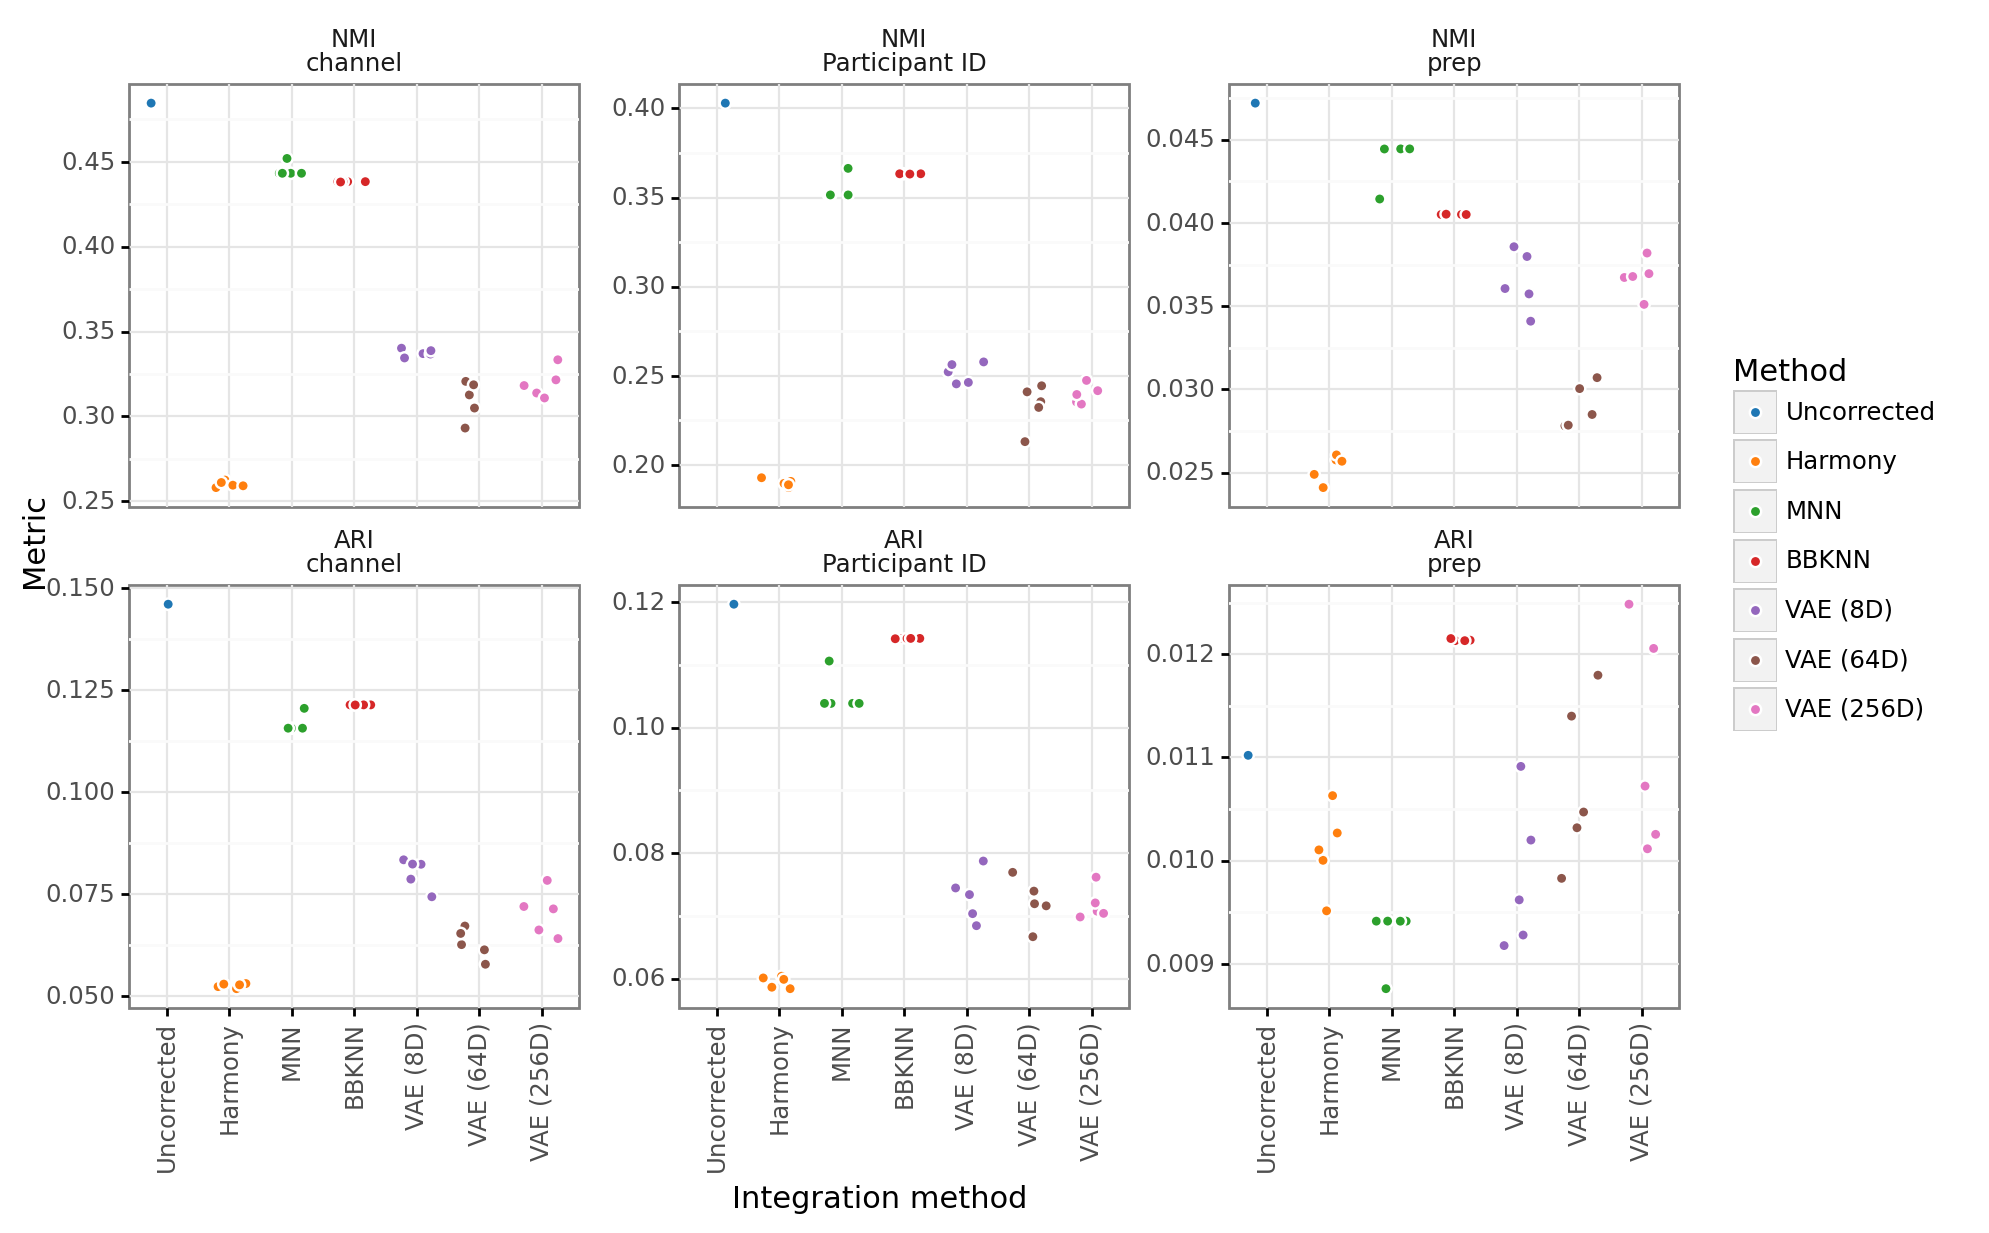

<ggplot: (8730240471992)>

In [31]:
g = (
    ggplot(aes(x='Method', y='Value', fill='Method'), data=metric_df[metric_df.Variable.isin(['channel', 'Participant ID', 'prep'])]) +
    geom_jitter(size=1.8, width=0.3, color='white') +
    facet_wrap(['Metric', 'Variable'], ncol=3, scales='free_y') +
    scale_fill_cmap_d('tab10') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90), figure_size=(10, 6), strip_background=element_blank(), panel_spacing_x=0.5) +
    labs(x='Integration method', y='Metric')
)

ggsave(g, 'figure-integration-D.pdf')
g

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


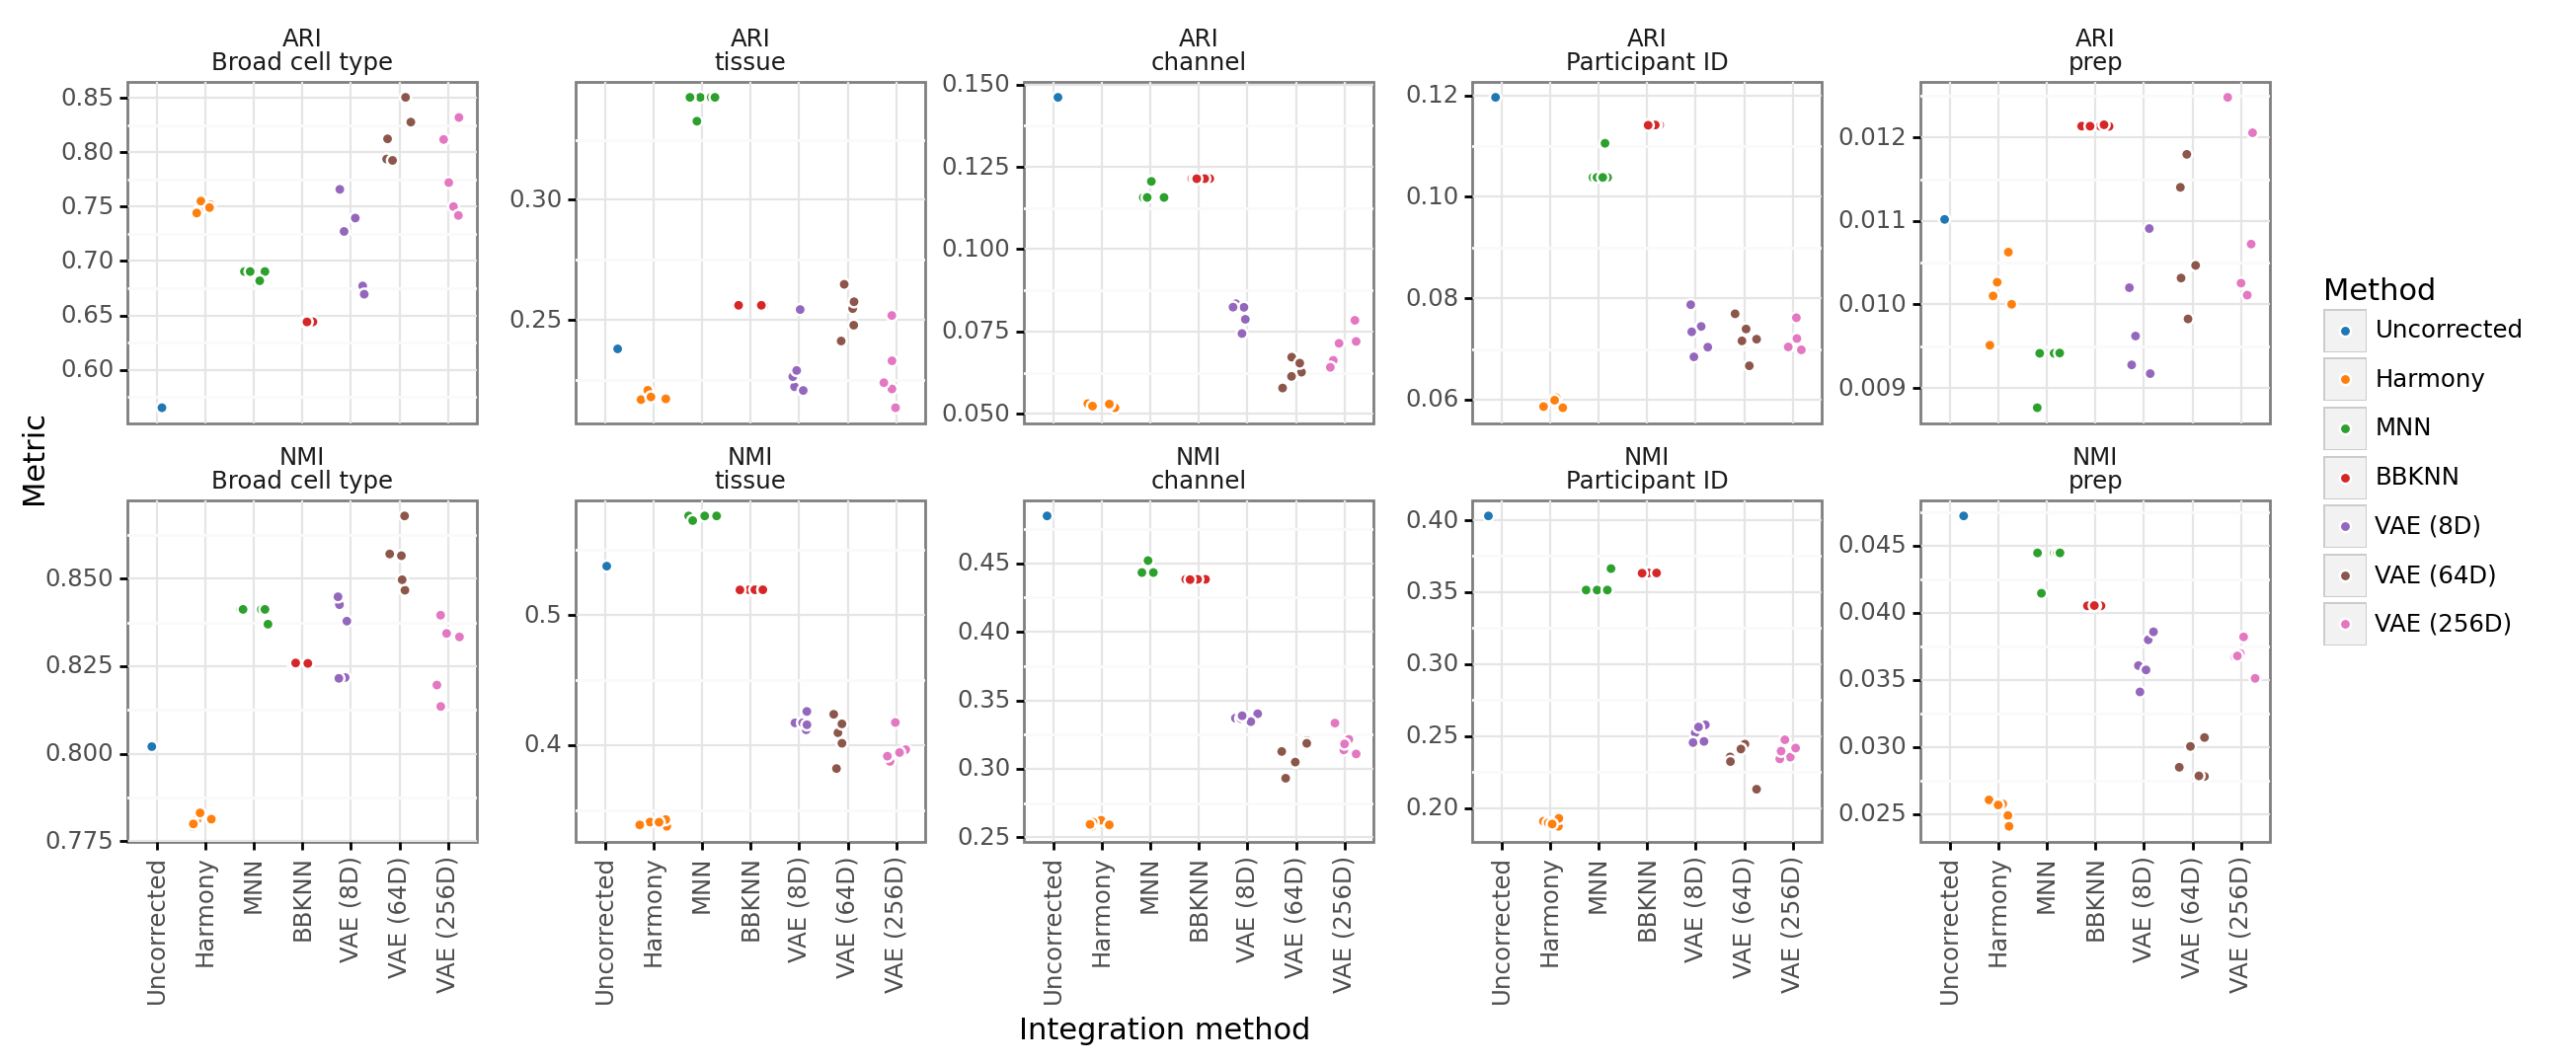

<ggplot: (8730369923054)>

In [10]:
(
    ggplot(aes(x='Method', y='Value', fill='Method'), data=metric_df[metric_df.Metric != 'kBET']) +
    geom_jitter(size=1.8, width=0.3, color='white') +
    facet_wrap(['Metric', 'Variable'], ncol=5, scales='free_y') +
    scale_fill_cmap_d('tab10') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90), figure_size=(14, 5), strip_background=element_blank(), panel_spacing_x=0.5) +
    labs(x='Integration method', y='Metric')
)

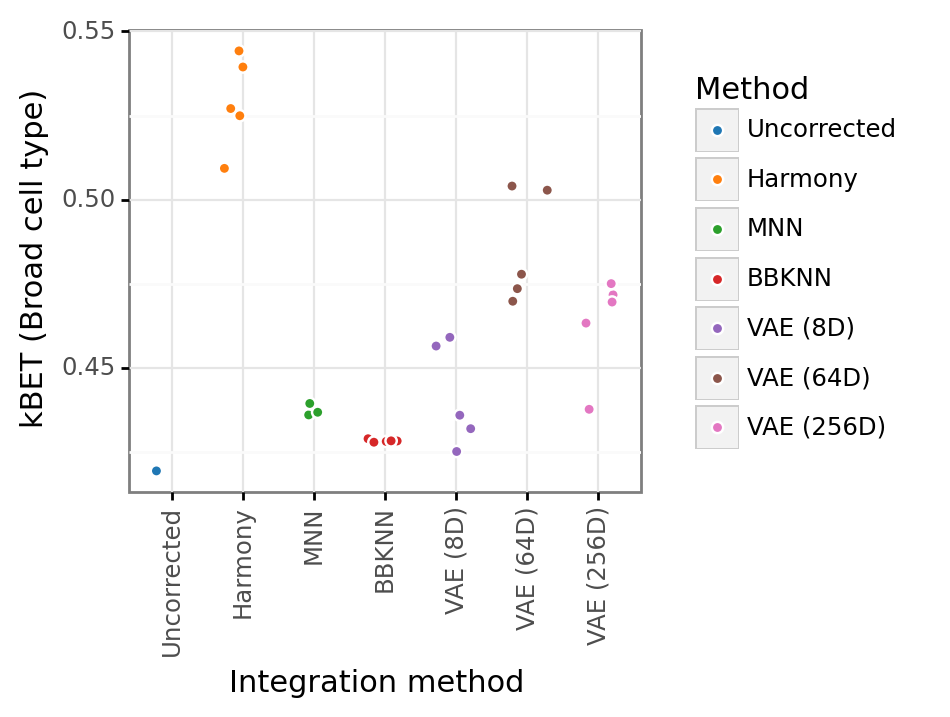

<ggplot: (8730367299777)>

In [11]:
(
    ggplot(aes(x='Method', y='Value', fill='Method'), data=metric_df[metric_df.Metric == 'kBET']) +
    #geom_boxplot(alpha=0.2, width=0.6, outlier_shape='') +    
    geom_jitter(width=0.3, size=1.8, color='white') +
    theme_bw() +
    #scale_y_continuous(limits=[0, None]) +
    scale_fill_cmap_d('tab10') +
    theme(axis_text_x=element_text(angle=90), figure_size=(3.3, 3), strip_background=element_blank()) +
    labs(x='Integration method', y='kBET (Broad cell type)')
)

## Runtimes

In [12]:
s = '''BBKNN	Harmony	MNN	VAE (8D)	VAE (64D)	VAE (256D)
1752	1134	46536	650	663	712
1953	1074	52434	699	730	781
1966	1120	49762	865	907	979
2005	1105	41365	948	975	1039
1941	1078	47303	640	686	733'''

from io import StringIO

runtimes = pd.read_table(StringIO(s)).melt(var_name='Method', value_name='Runtimes')
runtimes['Method'] = pd.Categorical(runtimes['Method'], categories=['Uncorrected', 'Harmony', 'MNN', 'BBKNN', 'VAE (8D)', 'VAE (64D)', 'VAE (256D)'])

In [13]:
import datetime

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 3 x 3 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-integration-B.pdf


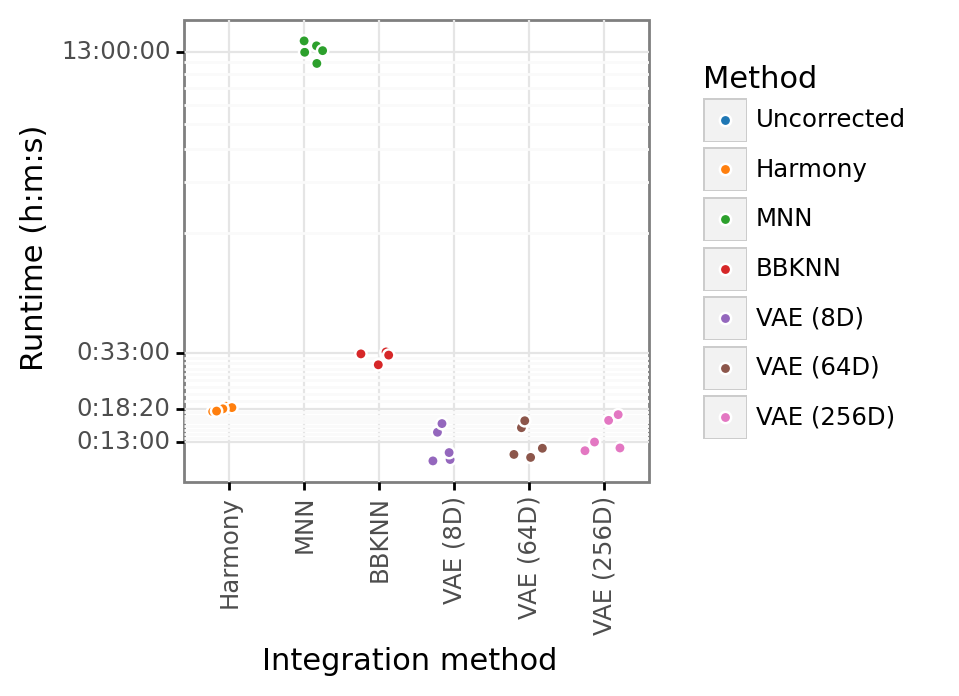

<ggplot: (8730240267783)>

In [32]:
g = (
    ggplot(aes(x='Method', y='Runtimes', fill='Method'), data=runtimes) +
    geom_jitter(width=0.3,color='white', size=1.8) +
    theme_bw() +
    scale_fill_cmap_d('tab10') +
    scale_y_continuous(labels=lambda x: [datetime.timedelta(seconds=y) for y in x], trans='log10', breaks=[780, 1100, 1980, 46800]) +
    theme(axis_text_x=element_text(angle=90), figure_size=(3, 3), strip_background=element_blank()) +
    labs(x='Integration method', y='Runtime (h:m:s)')
)

ggsave(g, 'figure-integration-B.pdf')
g